<a href="https://colab.research.google.com/github/son50git/Routine-with-Python/blob/master/StackedBar_v11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
# side by side <- NEXT task

In [2]:
from google.colab import drive, files
drive.mount("/content/drive")
uploaded = files.upload()
rpt_name ="Routine_rpts_20201201_1245_mac.xlsx"

Mounted at /content/drive


Saving Routine_rpts_20201201_1245_mac.xlsx to Routine_rpts_20201201_1245_mac.xlsx


In [3]:
def woe_and_scores(rpt_name, data_dur, roll_prd, min_periods): 

  # data prep
  sheet1 = "Daily_Output_Sup"
  woe_df = pd.read_excel(rpt_name, sheet_name=sheet1)
  woe_df.drop(woe_df.tail(1).index,inplace=True) # drop the last row
  woe_df["woe"] = woe_df.WOE.rolling(roll_prd, min_periods=roll_prd).mean()
  woe_df["score"] = woe_df.SCORE.rolling(roll_prd, min_periods=roll_prd).mean()
  woe_df = woe_df.tail(data_dur)
  woe_df.reset_index(inplace=True)
  woe_df.index = woe_df.index + 1
  woe_df = woe_df[["DATE","DAY","woe","score"]]

  sheet2 = "RD Cats"
  cats_df = pd.read_excel(rpt_name, sheet_name=sheet2)
  cats_df["ART"] = cats_df.ART.rolling(roll_prd, min_periods=roll_prd).mean()
  cats_df["SLP"] = cats_df.SLP.rolling(roll_prd, min_periods=roll_prd).mean()
  cats_df["ORD"] = cats_df.ORD.rolling(roll_prd, min_periods=roll_prd).mean()
  cats_df["LES"] = cats_df.LES.rolling(roll_prd, min_periods=roll_prd).mean()
  cats_df["TRA"] = cats_df.TRA.rolling(roll_prd, min_periods=roll_prd).mean()
  cats_df["Rel"] = cats_df.Rel.rolling(roll_prd, min_periods=roll_prd).mean()
  cats_df["Ref"] = cats_df.Ref.rolling(roll_prd, min_periods=roll_prd).mean()
  cats_df["PHA"] = cats_df.PHA.rolling(roll_prd, min_periods=roll_prd).mean()
  cats_df["SPC"] = cats_df.SPC.rolling(roll_prd, min_periods=roll_prd).mean()
  cats_df = cats_df.tail(data_dur)

  cats_df.reset_index(inplace=True)
  cats_df.index = cats_df.index + 1
  cats_df1 = cats_df[['Date','Day','ART','Rel','Ref','PHA','LES']]
  cats_df1["Pos_PCT"] = cats_df1.iloc[:, -5:-2].sum(axis=1) / 1440.00
  cats_df1 = cats_df1[["Pos_PCT","ART","LES"]]

  # data view
  woe_df_concat = pd.concat([woe_df, cats_df1], axis=1)
  print(woe_df_concat)

  tmp_2 = [i + j for i,j in zip(cats_df["ART"],cats_df["Rel"])]
  tmp_3 = [i + j for i,j in zip(tmp_2,cats_df["Ref"])]
  tmp_4 = [i + j for i,j in zip(tmp_3,cats_df["PHA"])]
  tmp_5 = [i + j for i,j in zip(tmp_4,cats_df["ORD"])]
  tmp_6 = [i + j for i,j in zip(tmp_5,cats_df["TRA"])]
  tmp_7 = [i + j for i,j in zip(tmp_6,cats_df["SPC"])]
  tmp_8 = [i + j for i,j in zip(tmp_7,cats_df["LES"])]
  bar_l = [i+1 for i in range(len(cats_df['ART']))]

  # graph prep
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
  ax1.plot(woe_df["woe"], color='blue', linewidth=4)
  ax1.tick_params(axis='y', labelcolor='blue')
  ax1b = ax1.twinx() 
  woe_df["score"].plot(kind='bar', facecolor='.8', alpha=.5)

  ax2.bar(bar_l, cats_df["ART"], label="ART", color="olive")
  ax2.bar(bar_l, cats_df["Rel"], label="Rel", color="purple", bottom=cats_df["ART"])
  ax2.bar(bar_l, cats_df["Ref"], label="Ref", color="pink", bottom=tmp_2)
  ax2.bar(bar_l, cats_df["PHA"], label="PHA", color="cyan", bottom=tmp_3)
  ax2.bar(bar_l, cats_df["ORD"], label="ORD", color="brown", bottom=tmp_4)
  ax2.bar(bar_l, cats_df["TRA"], label="TRA", color="gray", bottom=tmp_5)
  ax2.bar(bar_l, cats_df["SPC"], label="SPC", color="black", bottom=tmp_6)
  ax2.bar(bar_l, cats_df["LES"], label="LES", color="red", bottom=tmp_7)
  ax2.bar(bar_l, cats_df["SLP"], label="SLP", color="blue", bottom=tmp_8)
  ax2.legend(loc='center left', bbox_to_anchor=(1, 0.75))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


          DATE  DAY       woe       score   Pos_PCT         ART         LES
1   11/10/2020  TUE  0.493111  141.857143  0.349504  412.714286   65.571429
2   11/11/2020  WED  0.425962  142.142857  0.340179  409.428571   77.571429
3   11/12/2020  THU  0.376379  144.142857  0.339385  410.000000   71.428571
4   11/13/2020  FRI  0.431795  152.571429  0.360119  447.428571   71.142857
5   11/14/2020  SAT  0.340124  150.714286  0.351587  437.428571   75.571429
6   11/15/2020  SUN  0.224439  132.285714  0.354861  448.000000   82.000000
7   11/16/2020  MON -0.003185  116.857143  0.333433  417.000000  118.428571
8   11/17/2020  TUE -0.215864  100.857143  0.340278  426.142857  134.857143
9   11/18/2020  WED -0.380145   95.571429  0.335615  423.000000  167.857143
10  11/19/2020  THU -0.458137   87.000000  0.323810  403.142857  215.571429
11  11/20/2020  FRI -0.503415   84.000000  0.310317  380.428571  208.285714
12  11/21/2020  SAT -0.488572   77.714286  0.311706  386.142857  209.428571
13  11/22/20

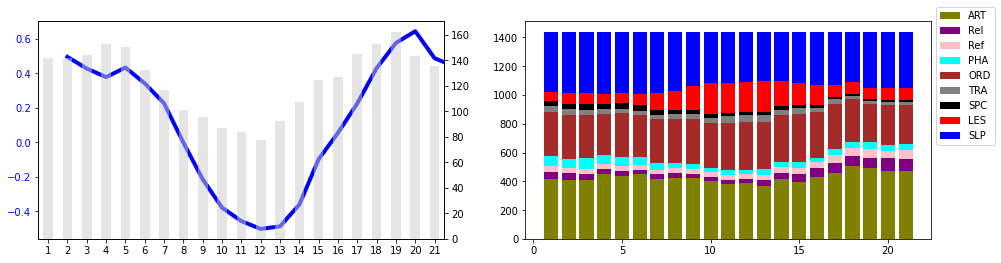

In [4]:
woe_and_scores(rpt_name, data_dur=21, roll_prd=7, min_periods=7)